# Ex08 Aplicações da DFT

## Parte 1 - Filtragem no Domínio da Frequência

Dos itens abaixo *a*, *b* e *c* você deve fazer obrigatoriamente o item *a* e no mínimo mais um item: *b* ou *c*. Nada impede você de fazer os 3 itens: *a*, *b* e *c*.

### a. Projetando filtros no domínio da frequência

Para projetar os filtros no domínio da frequência, utilize imagens sintéticas, como círculo ou quadrado ou retângulo (filtros ideais), tomando-se o cuidado para verificar se estes filtros são complexos-conjugados. Se preciso, crie uma função que retorne *True*, caso a imagem seja complexa conjugada e *False*, caso contrário. Lembre-se também que o projeto do filtro é normalmente feito no espectro ótico de Fourier, mas sua aplicação é feita com coordenadas 0 a N-1.

Teste os filtros projetados filtrando alguma imagem.

### b. Filtro Butterworth

Crie uma função para projetar um filtro passa-baixas Butterworth. A função de transferência do filtro passa-baixas de Butterworth de ordem $n$ e com posição da frequência de corte a uma distância $D_0$ da origem é definida pela relação $$ H(u,v) = \frac{1}{1 + [\frac{D(u,v)}{D_0}]^{2n}}, $$ onde $n$ é a ordem do filtro. Para facilitar a implementação, podemos usar a seguinte expressão: $$ H(u,v) = \frac{1}{1 + (\sqrt{2} - 1)(\sqrt{(\frac{u}{N})^2 + (\frac{v}{M})^2)}.t_c)^{2n}}$$ com $$ u \in{[-\frac{N}{2},N - \frac{N}{2} -1]}$$ $$ v \in{[-\frac{M}{2},M - \frac{M}{2} -1]}$$ $$ t_c \in{[2, max\{N,M\}]}$$

Compare o resultado da filtragem de uma imagem usando um filtro ideal e o filtro de Butterworth.

### c.  Filtrando uma imagem com textura

Veja que a imagem do código de barras a seguir possui uma textura no fundo. Projete um filtro (em frequencia) que elimine esta textura, sem borrar demais a imagem.

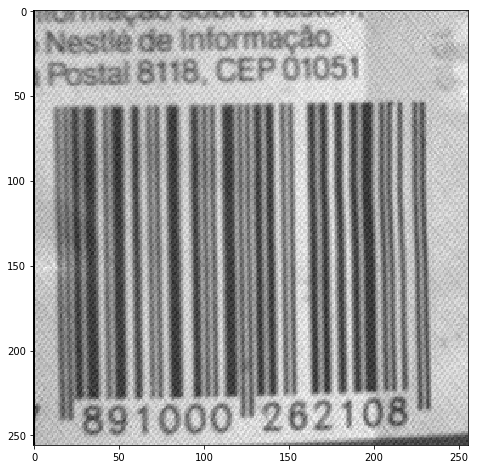

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

f = mpimg.imread('../data/barcode.tif')
plt.figure(figsize=(8,8))
plt.imshow(f,cmap='gray');
plt.show()

In [94]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft2, ifft2
import sys,os
ia898path = os.path.abspath('../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import src as ia

In [95]:
# glue matrices side by side
def glue(m_list):
    glued_mtrx = m_list[0]
    amount = len(m_list)
    for i in range(1,amount):
        glued_mtrx = np.concatenate((glued_mtrx, m_list[i]), axis=1)
    return glued_mtrx

## Solução 1.a

# Function ihpf

## Synopse

This function returns an ideal low pass filter based on ellipses.

- **g = ihpf(Dx, Dy =None, shape = (256,256))**

    - **g**:output: ideal low pass filter based on ellipses.
    - **Dx** and **Dy**:inputs: parameters of the standard form of the ellipse equation like: $\frac{x^{2}}{Dx^{2}} + \frac{y^{2}}{Dy^{2}} < 1$. if Dy is not specified then the filter is based on a circle of radius Dx.
    - **shape**:input: shape of output.

In [96]:
# filtro passa baixa ideal
def ilpf(Dx, Dy = None, shape = (256,256)):
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import src as ia
    
    H, W = shape
    
    r,c = np.indices(shape)
    r -= H//2
    c -= W//2
    
    if Dy == None:
        Dy = Dx
    f = (((r/Dx)**2 + (c/Dy)**2) < 1)
    return (ia.ptrans2d(f.astype("uint8"),(H//2,W//2)))

# Function ihpf

## Synopse

This function returns an ideal high pass filter based on ellipses.

- **g = ihpf(Dx, Dy =None, shape = (256,256))**

    - **g**:output: ideal high pass filter based on ellipses.
    - **Dx** and **Dy**:inputs: parameters of the standard form of the ellipse equation like: $\frac{x^{2}}{Dx^{2}} + \frac{y^{2}}{Dy^{2}} > 1$. if Dy is not specified then the filter is based on a circle of radius Dx.
    - **shape**:input: shape of output.

In [97]:
# filtro passa alta ideal
def ihpf(Dx, Dy = None, shape = (256,256)):
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import src as ia
    
    H, W = shape
    
    r,c = np.indices(shape)
    r -= H//2
    c -= W//2
    
    if Dy == None:
        Dy = Dx
    f = (((r/Dx)**2 + (c/Dy)**2) > 1)
    return (ia.ptrans2d(f.astype("uint8"),(H//2,W//2)))

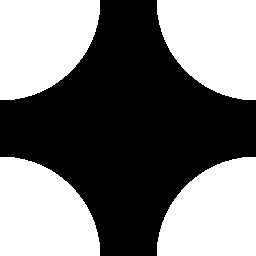

In [98]:
g = ilpf(Dx=100, Dy = 100, shape=(256,256))
Image.fromarray(g*255, mode="L")

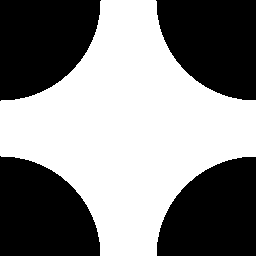

In [99]:
g = ihpf(Dx=100, Dy = 100, shape=(256,256))
Image.fromarray(g*255, mode="L")

## Aplicando Filtros Ideais 

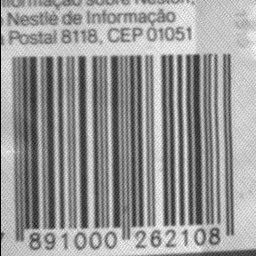

In [100]:
img = Image.open("../data/barcode.tif")
img_matrix = np.asarray(img)
img

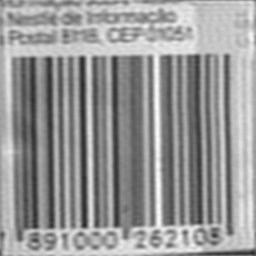

In [101]:
mask = ilpf(Dx=50, Dy=30, shape=img_matrix.shape)
blurred = ifft2(fft2(img_matrix)*mask)
Image.fromarray(np.real(blurred).astype("uint8"))

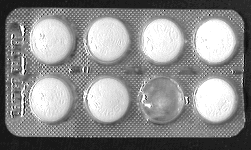

In [102]:
img = Image.open("../data/astablet.tif").convert("L")
img_matrix = np.asarray(img)
img

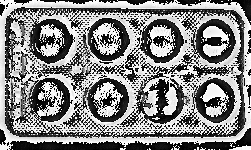

In [103]:
mask = ihpf(Dx=10, Dy=10, shape=img_matrix.shape)
boards = ifft2(fft2(img_matrix)*mask)
Image.fromarray(np.real(boards).astype("uint8"))

## Solução 1.c

# Function fourier_spec

## Synopse

This function returns the Fourier Spectrum of a Fourier Transform.

- **g = fourier_spec(ft, t)**

    - **g**:output: fourier spectrum as ndarray.
    - **ft**:input: Fourier transform of an image as ndarray.

In [104]:
def fourier_spec(ft):
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import src as ia
    H, W = ft.shape
    return ia.normalize(np.log(np.abs(ia.ptrans2d(ft,(H//2,W//2)))))

Para projetarmos um filtro que seja capaz de eliminar a textura da imagem alvo, devemos analisar o espectro de fourier dela e tentar encontrar o padrão desta textura para que possamos eliminá-la.

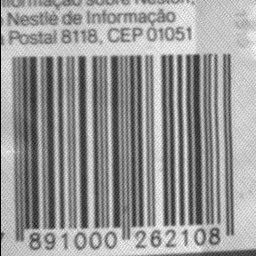

In [105]:
img = Image.open("../data/barcode.tif")
img_matrix = np.asarray(img)
img

""
""

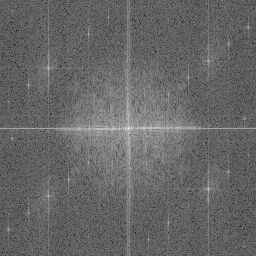

In [106]:
img_ft = fft2(img_matrix)
ia.adshow(fourier_spec(img_ft))

Ao olhar para o espectro da imagem, temos a seguinte intuição de que os pontos alinhados nas direções paralelas à diagonal secundária da matriz do espectro representam as descontinuidades provocadas pela linhas paralelas à diagonal principal da matriz da imagem. Assim, queremos projetar um filtro no dominio da frequência que elimine esses pontos de modo que a textura desapareça da imagem.

A mascara a seguir é escolhida de modo que apenas as regiões de interesse sejam selecionadas

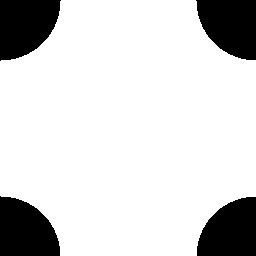

In [107]:
#mask = ia.ptrans2d(ilpf(Dx=100, Dy = 100, shape=img_ft.shape), (img_ft.shape[0]//2, img_ft.shape[1]//2))
mask = ihpf(Dx=60, shape=img_ft.shape)
Image.fromarray(mask*255)

""
""

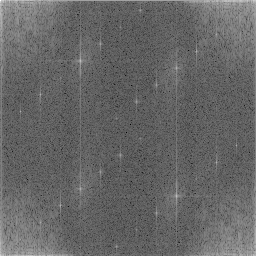

In [108]:
fs = ia.normalize(np.log(np.abs(ia.ptrans2d(img_ft,(0,0)))))
ia.adshow(fs)

Após termos selecionado apenas as regiôes de interesse, podemos escolher um valor de threshold adequado em relação ao espectro de fourier para selecionarmos apenas os pontos que queremos atenuar. Assim, obteremos como resultado o espectro a seguir.

""
""

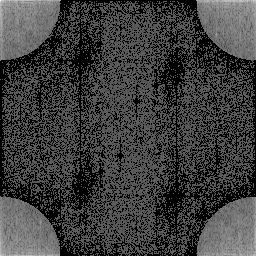

In [109]:
ft_mask = fs*mask
ft_mask[ft_mask < 100] = 0
fs[ft_mask > 0 ] = 1
ia.adshow(fs)

Assim, basta fazermos uma simples transformação, utilizando a mesma mascara que utilizamos para atenuar o espectro, para atenuar a tranformada da imagem também.

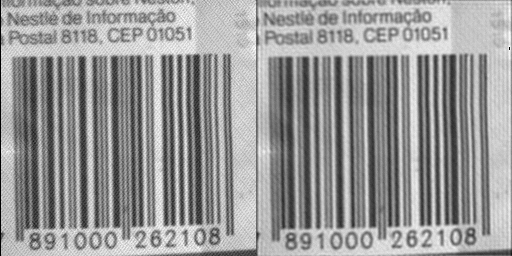

In [110]:
img_ft[ft_mask > 0] = 1
output = np.real(ifft2(img_ft))
in_out = glue([img_matrix, output])
Image.fromarray(in_out.astype("uint8"))

Acima, temos a esquerda a imagem original e a direita a imagem filtrada. Comparadas lado a lado vemos que a textura de fato foi eliminada sem borrarmos consideravelmente a imagem. Abaixo podemos ver melhor.

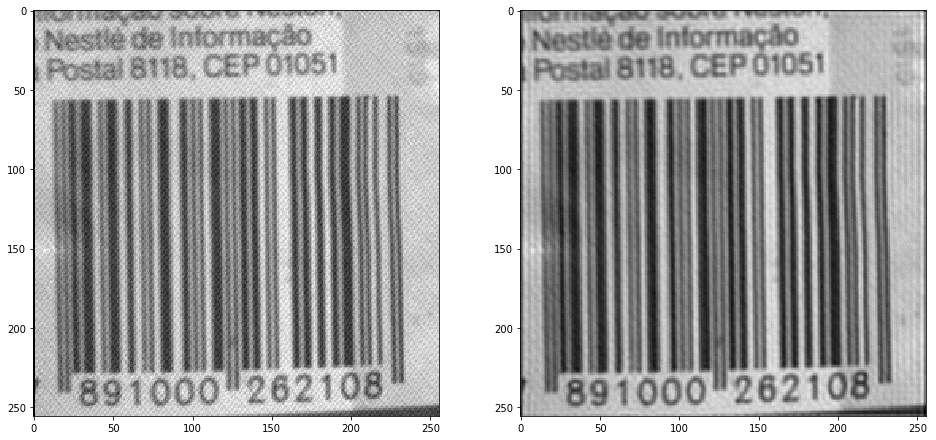

In [111]:
f = plt.figure(figsize=(16,16))
ax1 = f.add_subplot(1,2,2)
ax1.imshow(output,cmap='gray');
ax2 = f.add_subplot(1,2,1)
ax2.imshow(img_matrix,cmap='gray');
plt.show()

## Parte 2 - Identificando Translação/Rotação por Correlação de Fase

Dos itens abaixo *a*, *b* e *c* você deve fazer obrigatoriamente o item *a* e no mínimo mais um item: *b* ou *c*. Nada impede você de fazer os 3 itens: *a*, *b* e *c*.

Através da Correlação de fase é possível identificar uma translação ou uma rotação sofrida por uma imagem (veja o notebook [Correlação de Fase](13 Correlacao de fase.ipynb)). 

### a. Coordenada polar da imagem ou da DFT?

Para identificar a rotação, a imagem é transformada para coordenadas polares, para depois ser aplicada a Transformada de Fourier e então calculada a correlação de fase. Verifique se é equivalente fazer a transformada de Fourier e só depois fazer a conversão para coordenadas polares no domínio da frequência para então computar a correlação de fase;

### b. Rotação e translação simultaneas

Imagine agora que uma imagem tenha sofrido rotação e translação simultaneamente. Tente agora identificar ambas transformações com esta mesma técnica. (DICA: Tente resolver o problema em 2 etapas, ou seja, aplicando 2 vezes os passos para a correlação de fase);
    c. (Opcional) Identifique o quão robusta é esta técnica, com relação a: ruído, variação de contraste, escala

### c. *Template Matching* 

Experimente resolver um problema de *Template Matching* usando correlação fase. Ou seja, recorte um pedaço de uma imagem e tente encontrar este pedaço na imagem original maior.

In [32]:
import warnings

## Solução 2.a

### Imagem Original

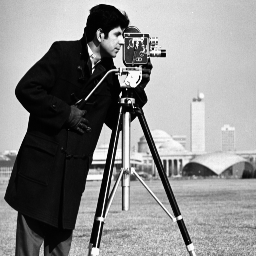

In [21]:
img = Image.open("../data/cameraman.tif")
img_matrix = np.asarray(img)
img

### Imagem em coodenadas polares

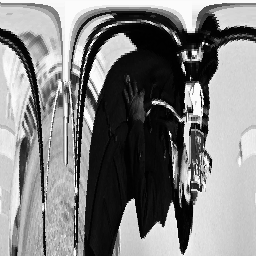

In [27]:
polar_img = ia.polar(img_matrix, img_matrix.shape, np.pi*2)
Image.fromarray(polar_img)

Para checar a veracidade da afirmação feita no enunciado, basta verificar se a tranformada de fourier da imagem em coordenadas polares produz o mesmo resultado da tranformada de fourier em coordenadas polares da imagem original, isto é, $\mathcal{F}(f(r,\theta))(r,\theta) = \mathcal{F}(f(x,y))(r, \theta)$.

In [31]:
warnings.filterwarnings('ignore') # just ignore warning due ComplexWarning
polar_ft = ia.polar(fft2(img_matrix), img_matrix.shape, np.pi*2)
warnings.filterwarnings('default') # get back to normal
polar_ft2 = fft2(polar_img)
polar_ft.all() == polar_ft2.all()

True

Portanto, podemos inferir que não há diferença entre mudar de coordenada antes ou após a transformada da imagem, já que o resultado produzido é o mesmo.

## Solução 2.c

A correlação de fase diz que, se calcularmos a Transformada Discreta de Fourier de duas imagens $f$ and $h$:

$$ F = \mathcal{F}(f); $$$$ H = \mathcal{F}(h) $$

E em seguida calcularmos a correlação $R$ das transformadas: 
$$ R = \dfrac{F H^*}{|F H^*|} $$

Depois, aplicarmos a transformada inversa a $R$
$$ g = \mathcal{F}^{-1}(R) $$

A translação entre as duas imagens pode ser encontrada fazendo-se:
$$ (row, col) = arg max\{g\} $$

Portanto, devemos realizar os mesmos passos acima para resolver a tarefa. Primeiro recortamos um pedaço da imagem e computamos a sua transformada e tomamos o seu conjugado.

""
""

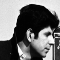

In [92]:
width_cut = 60
cut = np.zeros(img_matrix.shape, dtype="uint8")
cut[0:width_cut,0:width_cut] = img_matrix[0:width_cut, 70:70+width_cut]
H = np.conjugate(fft2(cut))
ia.adshow(cut[0:width_cut,0:width_cut])

E computamos a tranformada de fourier da imagem original também.

In [46]:
F = fft2(img_matrix)

Agora, podemos calcular a correlação R das tranformadas.

In [47]:
R = F*H/np.abs(F*H)

Finalmente, podemos computar a tranformada inversa de R e tomar o seu argumento máximo. Assim, para encontrar a posição de maior matching, basta encontrar o ponto do argumento máximo encontrado.

In [51]:
g = np.argmax(np.real(ifft2(R)))
p = np.unravel_index(g,R.shape)
p

(0, 70)

Assim, obtemos como resposta a região marcada em vermelho.

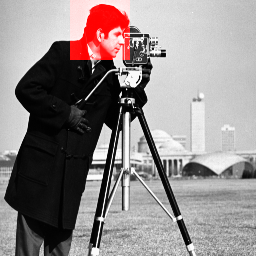

In [91]:
correlation = Image.new("RGB", img_matrix.shape)
correlation.paste(img)
corr_matrix = np.asarray(correlation)
corr_matrix.setflags(write=1)
corr_matrix = corr_matrix.transpose(2,0,1)
corr_matrix[0, p[0]:p[0]+width_cut, p[1]:p[1]+width_cut] = 255
Image.fromarray(corr_matrix.transpose(1,2,0))